<a href="https://colab.research.google.com/github/adrianestebanrodriguez/Repositorio_Datasets/blob/main/Calidad_Harinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error Medio Absoluto (MAE): 1.14 días
Precisión (R2 Score): 0.9816


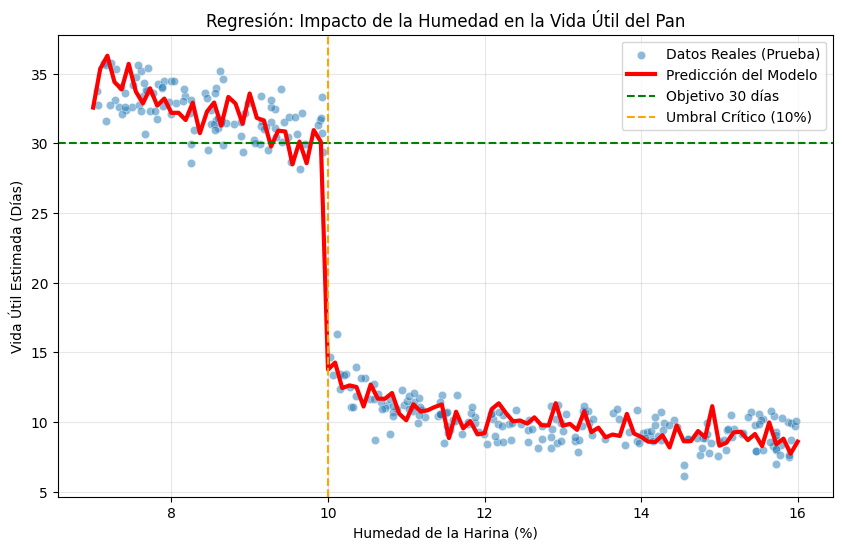

Para una humedad del 9.5%, la vida útil estimada es de 31.1 días.
Para una humedad del 11.2%, la vida útil estimada es de 10.4 días.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Generación de datos sintéticos con comportamiento no lineal
np.random.seed(42)
n_lotes = 1500

# Humedad entre 7% y 16%
humedad = np.random.uniform(7, 16, n_lotes)

# Simulamos la vida útil:
# Si humedad < 10%, vida útil decae suavemente desde 40 a 30 días.
# Si humedad > 10%, cae drásticamente hacia los 8 días.
def modelo_degradacion(h):
    if h < 10:
        # Relación lineal suave en zona segura
        return 45 - (1.5 * h) + np.random.normal(0, 1.5)
    else:
        # Caída drástica y asíntota cerca de los 7-8 días
        return 8 + (30 / (h - 9)) * 0.2 + np.random.normal(0, 1)

vida_util = [modelo_degradacion(h) for h in humedad]

df_reg = pd.DataFrame({'humedad_pct': humedad, 'vida_util_dias': vida_util})

# 2. Entrenamiento del Regresor
X = df_reg[['humedad_pct']]
y = df_reg['vida_util_dias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=200, random_state=42)
regressor.fit(X_train, y_train)

# 3. Predicciones y Evaluación
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Medio Absoluto (MAE): {mae:.2f} días")
print(f"Precisión (R2 Score): {r2:.4f}")

# 4. Visualización de la Curva de Predicción
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['humedad_pct'], y=y_test, alpha=0.5, label='Datos Reales (Prueba)')
# Crear línea de tendencia
x_range = np.linspace(7, 16, 100).reshape(-1, 1)
x_range_df = pd.DataFrame(x_range, columns=['humedad_pct']) # Convert to DataFrame with feature name
y_range = regressor.predict(x_range_df)
plt.plot(x_range, y_range, color='red', lw=3, label='Predicción del Modelo')

plt.axhline(y=30, color='green', linestyle='--', label='Objetivo 30 días')
plt.axvline(x=10, color='orange', linestyle='--', label='Umbral Crítico (10%)')
plt.title('Regresión: Impacto de la Humedad en la Vida Útil del Pan')
plt.xlabel('Humedad de la Harina (%)')
plt.ylabel('Vida Útil Estimada (Días)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Función de estimación rápida
def estimar_dias(humedad_input):
    # Convert the input to a DataFrame with the feature name 'humedad_pct'
    input_df = pd.DataFrame([[humedad_input]], columns=['humedad_pct'])
    dias = regressor.predict(input_df)[0]
    return f"Para una humedad del {humedad_input}%, la vida útil estimada es de {dias:.1f} días."

print(estimar_dias(9.5))
print(estimar_dias(11.2))

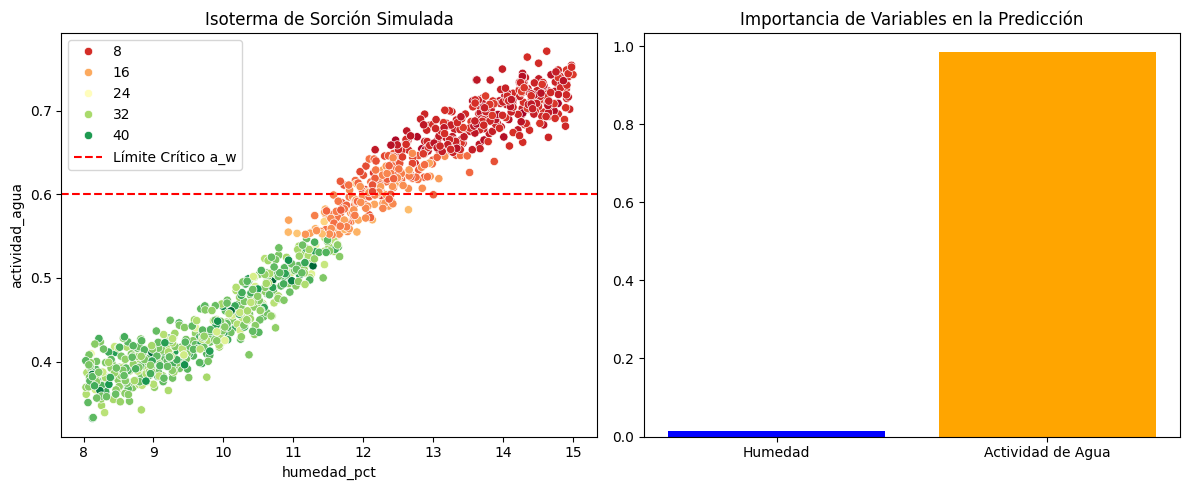

{'Días Estimados': np.float64(5.7), 'Estatus': 'RIESGO ALTO', 'Recomendación': 'Uso inmediato o rechazo'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Simulación de Datos Físico-Químicos
np.random.seed(42)
n_lotes = 1000

# Humedad (%)
humedad = np.random.uniform(8, 15, n_lotes)

# Simulación de a_w: Relación no lineal con la humedad (Isoterma)
# Generalmente la harina de trigo tiene a_w entre 0.4 y 0.75
def calcular_aw(h):
    # Función sigmoidal simplificada para representar la isoterma
    aw_base = 1 / (1 + np.exp(-(h - 11.5) * 0.8)) * 0.4 + 0.35
    return aw_base + np.random.normal(0, 0.02) # Ruido por proteína/temperatura

aw = np.array([calcular_aw(h) for h in humedad])

# Vida útil (Target): Depende fuertemente de a_w
# El punto crítico suele ser aw > 0.60 (crecimiento de mohos)
def vida_util_bio(aw_val):
    if aw_val > 0.65:
        return 7 + np.random.normal(0, 1) # Deterioro rápido
    elif aw_val > 0.55:
        # Zona de transición (riesgo medio)
        return 40 - (aw_val * 45) + np.random.normal(0, 2)
    else:
        return 35 + np.random.normal(0, 3) # Zona segura

vida_dias = np.array([vida_util_bio(a) for a in aw])

df = pd.DataFrame({
    'humedad_pct': humedad,
    'actividad_agua': aw,
    'vida_util_dias': vida_dias
})

# 2. Entrenamiento del Modelo Multivariable
X = df[['humedad_pct', 'actividad_agua']]
y = df['vida_util_dias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Predicciones
y_pred = model.predict(X_test)

# 4. Visualización de la Interacción Humedad vs a_w
plt.figure(figsize=(12, 5))

# Subplot 1: Relación Humedad vs a_w
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='humedad_pct', y='actividad_agua', hue='vida_util_dias', palette='RdYlGn')
plt.axhline(y=0.6, color='red', linestyle='--', label='Límite Crítico a_w')
plt.title('Isoterma de Sorción Simulada')
plt.legend()

# Subplot 2: Importancia de variables
plt.subplot(1, 2, 2)
importances = model.feature_importances_
plt.bar(['Humedad', 'Actividad de Agua'], importances, color=['blue', 'orange'])
plt.title('Importancia de Variables en la Predicción')

plt.tight_layout()
plt.show()

# 5. Función de predicción profesional
def predecir_calidad(h, a):
    res = model.predict([[h, a]])[0]
    status = "ACEPTABLE" if res >= 30 else "RIESGO ALTO"
    return {
        "Días Estimados": round(res, 1),
        "Estatus": status,
        "Recomendación": "Aprobado para góndola" if res >= 30 else "Uso inmediato o rechazo"
    }

# Ejemplo: Harina con humedad "baja" pero a_w alta (posible contaminación o mala molienda)
print(predecir_calidad(10.5, 0.68))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


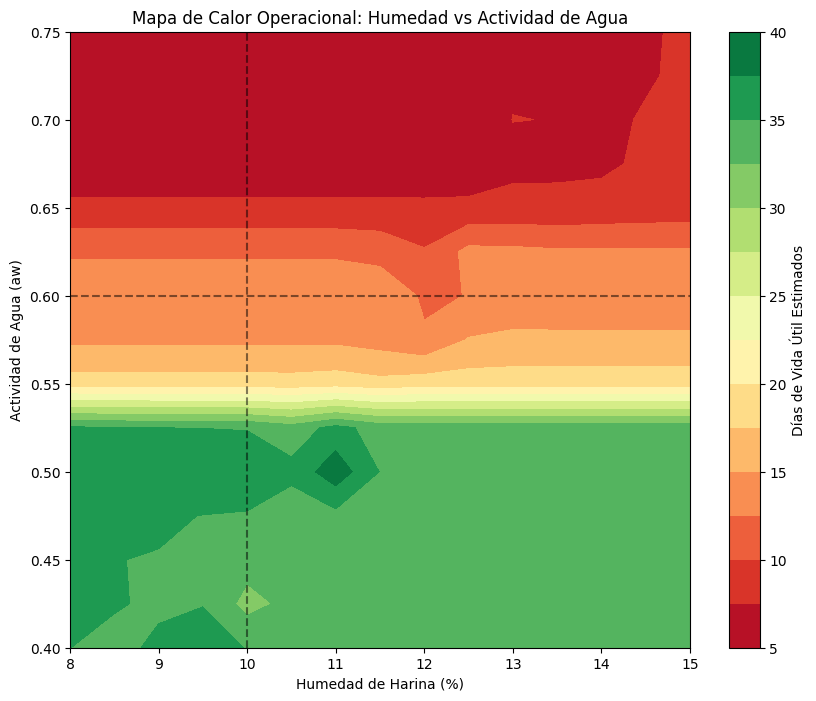

In [11]:
# Generar una rejilla (grid) de posibles valores
h_range = np.linspace(8, 15, 15)  # Humedad de 8% a 15%
aw_range = np.linspace(0.4, 0.75, 15) # aw de 0.4 a 0.75

grid_h, grid_aw = np.meshgrid(h_range, aw_range)
grid_flat = np.c_[grid_h.ravel(), grid_aw.ravel()]

# Predecir vida útil para toda la rejilla
pred_grid = model.predict(grid_flat).reshape(grid_h.shape)

# Visualización de la Matriz de Decisión
plt.figure(figsize=(10, 8))
cp = plt.contourf(grid_h, grid_aw, pred_grid, levels=15, cmap='RdYlGn')
plt.colorbar(cp).set_label('Días de Vida Útil Estimados')
plt.axhline(y=0.60, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=10.0, color='black', linestyle='--', alpha=0.5)
plt.title('Mapa de Calor Operacional: Humedad vs Actividad de Agua')
plt.xlabel('Humedad de Harina (%)')
plt.ylabel('Actividad de Agua (aw)')
plt.show()